# Exercise 1 -- Numerical Optimal Control

In [17]:
import typing as T

import casadi
import scipy
import matplotlib.pyplot as plt
import numpy as np

### Problem 1) 
Numerically approximate the following IVP problem using the scipy ODE solver, this is similar to ODE45 in MATLAB

$$
\begin{align}
  \dot{x}_1(t) &= x_2(t) \\
  \dot{x}_2(t) &= -0.2x_2(t) - x_1(t)     \\
  x(0) &= x_0 \\ 
\end{align}
$$


(20, 2)


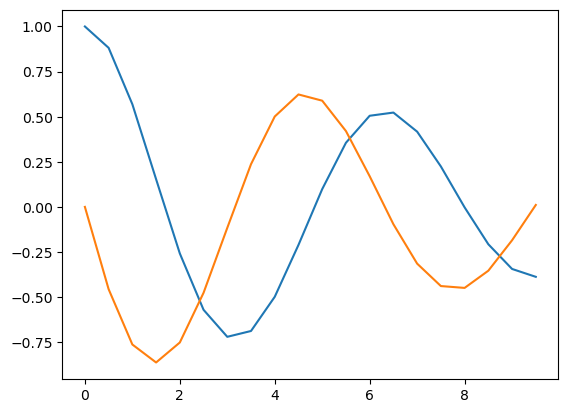

In [28]:
def damped_oscilator(x: np.ndarray) -> np.ndarray:
        x_dot = np.empty_like(x)
        x_dot[0] = x[1]
        x_dot[1] = -0.2 * x[1] - x[0]
        return x_dot

ts = 0.5
k = 20
t_scipy = np.arange(0, k) * ts

# Simulate using initial conditions
x0 = np.array([1, 0])

# Adapt the dynamics signature to work with scipy
damped_oscilator_helper = lambda x, t: damped_oscilator(x)
y_scipy = scipy.integrate.odeint(damped_oscilator_helper, x0, t_scipy)

print(y_scipy.shape)
plt.plot(t_scipy, y_scipy)


### Problem 2)

Implement two other explicit integration scehemes, first euler integration

$$
 x_{n+1} = x_n + h f(x_n)
$$

 and then the explicit Rugen-Kutta scheme of order 4.

$$
 k_1 = f(x_n) \qquad k_2 = f(x_n + \frac{h}{2} * k_1) \qquad k_3 = f(x_n + \frac{h}{2} k_2) \qquad k_4 = f(x_n + h k_3) \\
 x_{n+1} = x_n + \frac{h}{6} (k_1 + 2k_2 +2k_3 + k_4)
$$

Note, if $h$ is sufficiently large for the euler integration scheme, then the system becomes unstable.



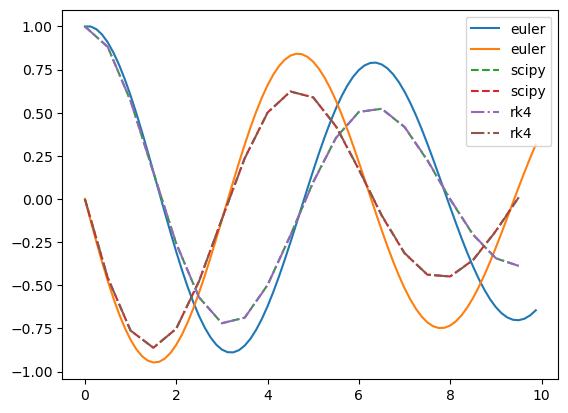

In [36]:
def euler_integration(f: T.Callable, x0: np.ndarray, t: np.ndarray) -> np.ndarray:
        x = np.copy(x0)
        x_seq = [x]
        for i in range(1, len(t)):
                dt = t[i] - t[i-1]
                x = x + dt * f(x)
                x_seq.append(x)
        return np.vstack(x_seq)

def rk4_integration(f: T.Callable, x0: np.ndarray, t: np.ndarray) -> np.ndarray:
        x = np.copy(x0)
        x_seq = [x]
        for i in range(1, len(t)):
                h = t[i] - t[i-1]
                
                k1 = f(x)
                k2 = f(x + h/2 * k1)
                k3 = f(x + h/2 * k2)
                k4 = f(x + h * k3)
                x = x + h/6 * (k1 + 2*k2 + 2*k3 + k4)
                x_seq.append(x)
        return np.vstack(x_seq)

simlength = 10.0 # Simulation length

h_euler = 0.125
t_euler = np.arange(0, int(simlength / h_euler)) * h_euler
y_euler = euler_integration(damped_oscilator, x0, t_euler)

h_rk = 0.5
t_rk = np.arange(0, int(simlength / h_rk)) * h_rk
y_rk = rk4_integration(damped_oscilator, x0, t_rk)

plt.plot(t_euler, y_euler,  linestyle="-", label="euler")
plt.plot(t_scipy, y_scipy, linestyle="--", label="scipy")
plt.plot(t_rk, y_rk, linestyle="-.", label="rk4")
plt.legend()

        